In [1]:
import gym
from deep_q_network import DeepQNetwork

In [2]:
env = gym.make('MountainCar-v0')
env = env.unwrapped

In [3]:
RL = DeepQNetwork(n_actions=3, n_features=2, learning_rate=0.001, e_greedy=0.9, replace_target_iter=300, memory_size=3000,e_greedy_increment=0.0001)

Epi:  0 | ---- | Ep_r:  7.6634 | Epsilon:  0.1
Epi:  1 | ---- | Ep_r:  22.9505 | Epsilon:  0.1
Epi:  2 | ---- | Ep_r:  15.7783 | Epsilon:  0.1
Epi:  3 | ---- | Ep_r:  14.1696 | Epsilon:  0.1
Epi:  4 | ---- | Ep_r:  17.5812 | Epsilon:  0.1
Epi:  5 | ---- | Ep_r:  13.2317 | Epsilon:  0.12
Epi:  6 | ---- | Ep_r:  9.235 | Epsilon:  0.14
Epi:  7 | ---- | Ep_r:  13.9361 | Epsilon:  0.16
Epi:  8 | ---- | Ep_r:  11.8429 | Epsilon:  0.18
Epi:  9 | ---- | Ep_r:  11.2924 | Epsilon:  0.2
Epi:  10 | ---- | Ep_r:  13.029 | Epsilon:  0.22
Epi:  11 | ---- | Ep_r:  15.1668 | Epsilon:  0.24
Epi:  12 | ---- | Ep_r:  17.1788 | Epsilon:  0.26
Epi:  13 | ---- | Ep_r:  23.0827 | Epsilon:  0.28
Epi:  14 | ---- | Ep_r:  14.9564 | Epsilon:  0.3
Epi:  15 | ---- | Ep_r:  14.5461 | Epsilon:  0.32
Epi:  16 | ---- | Ep_r:  15.8967 | Epsilon:  0.34
Epi:  17 | ---- | Ep_r:  13.5401 | Epsilon:  0.36
Epi:  18 | ---- | Ep_r:  30.8363 | Epsilon:  0.38
Epi:  19 | ---- | Ep_r:  17.3193 | Epsilon:  0.4
Epi:  20 | ---- | Ep_r

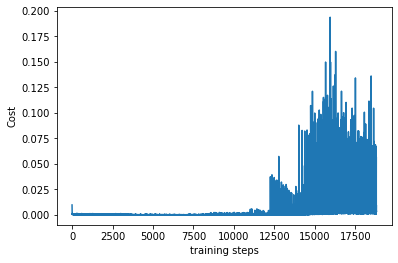

In [5]:
total_steps = 0
for i_episode in range(100):

    observation = env.reset()
    ep_r = 0
    while True:
        env.render()

        action = RL.choose_action(observation)

        observation_, reward, done, info = env.step(action)

        position, velocity = observation_

        # 车开得越高 reward 越大
        reward = abs(position - (-0.5))

        RL.store_transition(observation, action, reward, observation_)

        if total_steps > 1000:
            RL.learn()

        ep_r += reward
        if done:
            get = '| Get' if observation_[0] >= env.unwrapped.goal_position else '| ----'
            print('Epi: ', i_episode,
                  get,
                  '| Ep_r: ', round(ep_r, 4),
                  '| Epsilon: ', round(RL.epsilon, 2))
            break

        observation = observation_
        total_steps += 1
env.close()
RL.plot_cost()